## Task 1
### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/shivachandel/kc-house-data

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('kc_house_data.csv', encoding = 'cp1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

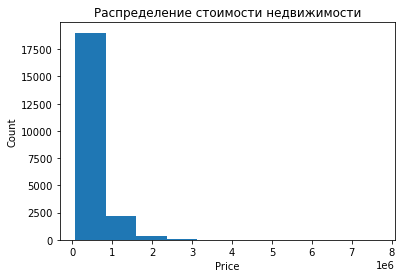

In [113]:
plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Price')
plt.ylabel('Count');

Основная часть (более 85%) недвижимости не более 1 млн руб.

### 1.3 Изучите распределение квадратуры жилой

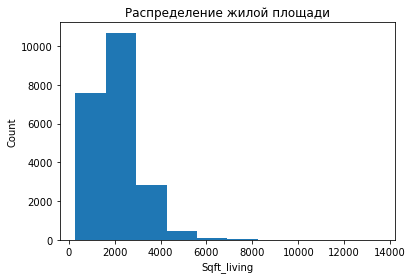

In [114]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('Sqft_living')
plt.ylabel('Count');

### 1.4 Изучите распределение года постройки

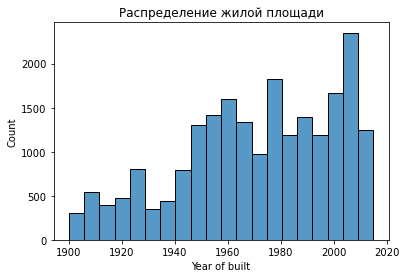

In [115]:
sns.histplot(df['yr_built'], bins=20)
plt.title('Распределение жилой площади')
plt.xlabel('Year of built')
plt.ylabel('Count');

По графику видно, что больше всего домов построено в начале 2000-х годов. 25% домов - построены до 1940х. 
Порядка половины всех домов построено в период с 1950 по 1990 г.г.

## Task 2

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [116]:
data =df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

In [117]:
names = data.index
values = data.values

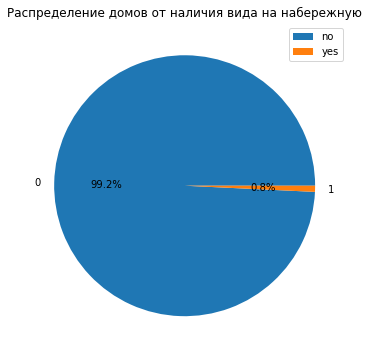

In [118]:
plt.figure(figsize=(8,6))
plt.pie(values, labels=names, autopct='%.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(['no', 'yes']);

Преобладающее большинство домов (99,2%) вид на набережную не имеет

### 2.2 Изучите распределение этажей домов

In [119]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [120]:
names = data.index
values = data.values

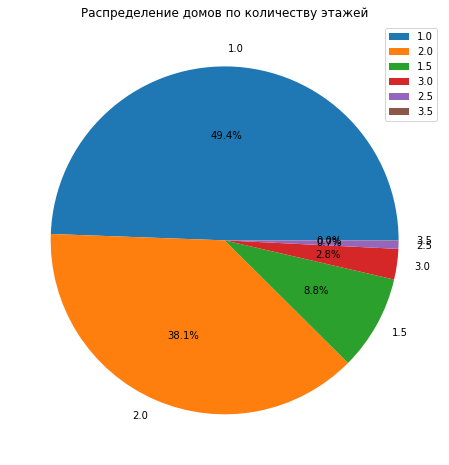

In [121]:
plt.figure(figsize=(12,8))
plt.pie(values, labels=names, autopct='%.1f%%')
plt.title('Распределение домов по количеству этажей')
plt.legend(data.index);

Преобладающее большинство домов - либо одноэтажные (50%), либо 2-хэтажные (около 40%). Менее 25% домов не имеют более 2х этажей.

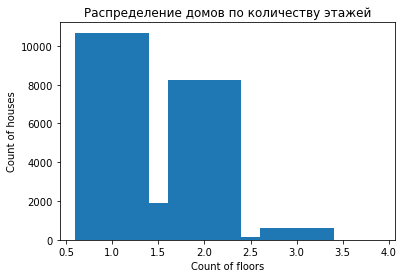

In [122]:
plt.bar(df['floors'].value_counts().index, height=df['floors'].value_counts().values)
plt.title('Распределение домов по количеству этажей')
plt.xlabel('Count of floors')
plt.ylabel('Count of houses');

Предыдущий вывод подтвердил и этот график. Дома преимущественно имеют либо 1, либо 2 этажа.

### 2.3 Изучите распределение состояния домов

In [123]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

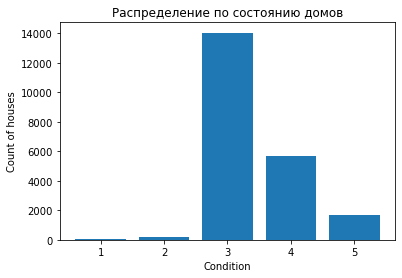

In [124]:
plt.bar(df['condition'].value_counts().index, height=df['condition'].value_counts().values)
plt.title('Распределение по состоянию домов')
plt.xlabel('Condition')
plt.ylabel('Count of houses');

Более половины домов имеют среднее состояние, поскольку, руководствуясь предыдущими графиками, построена в период с 1950 по 1980 годы. Около 30% домов имеют хорошее или отличное состояние, поскольку построены уже после 2000 года.

## Task 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

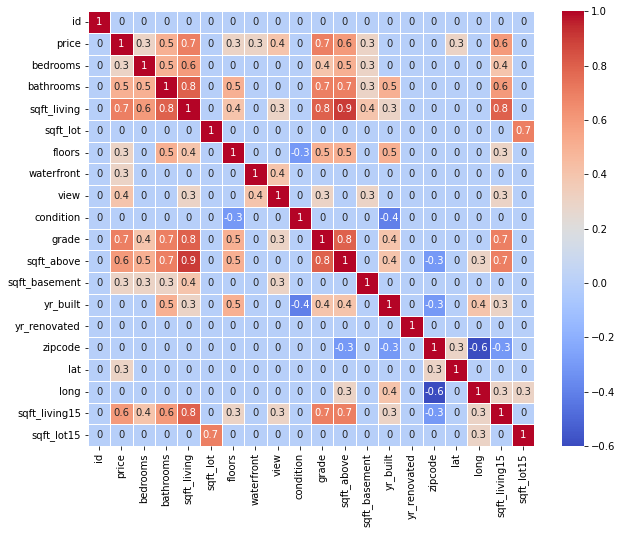

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Основные характеристики, влияющие на стоимость недвижимости: sqft_living, grade, sqft_above, sqft_living15, bathrooms.<br>
Незначительно влияют характеристики: view, bedrooms, floors, waterfront, sqft_basement, lat.<br>
Остальные характеристики влияния не оказывают.

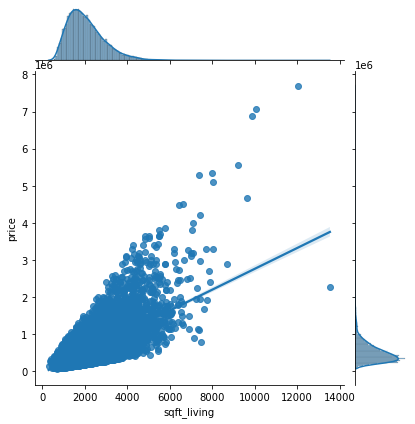

In [83]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

In [59]:
df['sqft_living'].max()

13540

In [68]:
df[df['sqft_living']==13540]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410.0,4130,1999,0,98053,47.6675,-121.986,4850,217800


Наблюдаем прямую зависимость стоимости от площадь дома. Тем не менее, присутствуют и выбросы, такие как дом с наибольшей площадью (13540) имеет достаточно среднюю стоимость (2_280_000). 

Text(0.5, 1.0, 'Зависимость цены от конструкции здания')

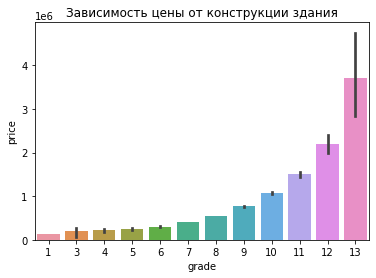

In [105]:
sns.barplot(x=df['grade'], y=df['price']);
plt.title('Зависимость цены от конструкции здания')

Подтверждается прямая зависимость цены от конструкции здания и дизайна (grade).

Text(0.5, 1.0, 'Зависимость стоимости от оценки вида')

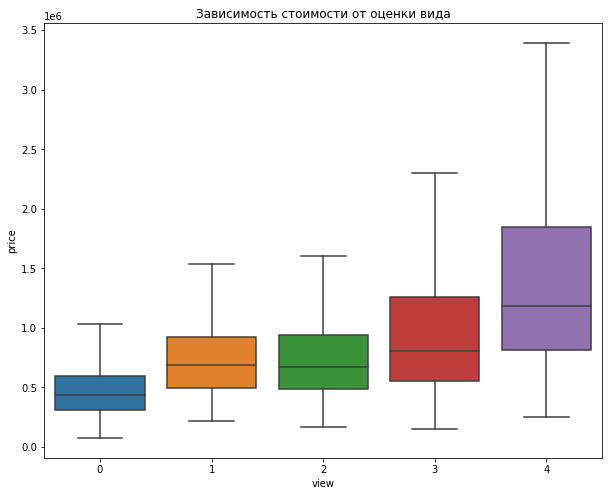

In [88]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['view'], y=df['price'], whis=1.5, showfliers=False)
plt.xlabel('view')
plt.ylabel('price')
plt.title('Зависимость стоимости от оценки вида')

Согласно матрице корреляции, зависимость вида от стоимости дома незначительна и равна 0,4, что в целом подтверждается графиком: стоимость практически не зависит от вида. Возможно, вследствие выбросов.

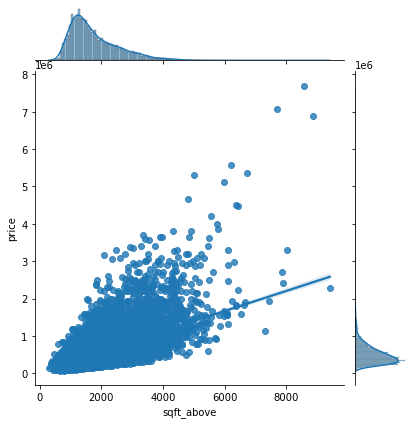

In [107]:
sns.jointplot(x=df['sqft_above'], y=df['price'], kind='reg');

Наблюдается прямая зависимость стоимости дома от показателя характеристики "sqft_above", как и в случае с характеристикой "sqft_living".

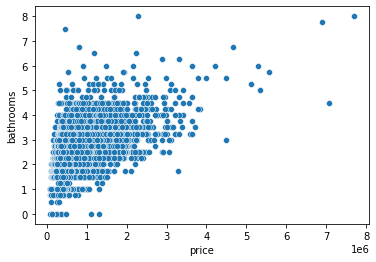

In [110]:
sns.scatterplot(x=df['price'], y=df['bathrooms']);

В целом, зависимость стоимости дома от количества ванных наблюдается прямая, но не столь явно выраженная, как в случае с характеристиками 'sqft_above' и 'sqft_living'.